## **Exploratory Data Analysis of Used Cars Dataset**

**Analysis Goals**

- **Descriptive Analysis:** Summarize the dataset to understand the distribution of various features such as year of manufacture, kilometers driven, fuel type, transmission, owner type, and seating capacity.
- **Price Analysis:** Investigate the factors affecting the resale price of cars. Analyze the relationship between the price and other features such as year, kilometers driven, fuel type, engine capacity, and power.
- **Geographical Insights:** Explore the geographical distribution of car sales and prices. Identify which locations have higher or lower average resale prices.
- **Trend Analysis:** Examine trends over time, such as how car prices have changed over the years and the impact of the year of manufacture on resale prices.
- **Missing Data Handling:** Address missing values in the dataset, particularly for the Mileage, Engine, Power, Seats, New_Price, and Price columns. Determine appropriate methods for handling or imputing these values, such as using mean, median, mode, or predictive modeling.
- **Correlation Analysis:** Conduct a correlation analysis to identify the strength and direction of relationships between different numerical features and the resale price.

### **Step 1: Import Python Libraries**

The first step involved in ML using python is understanding and playing around with our data using libraries. Here is the link to the dataset.

Import all libraries which are required for our analysis, such as Data Loading, Statistical analysis, Visualizations, Data Transformations, Merge and Joins, etc.

Pandas and Numpy have been used for Data Manipulation and numerical Calculations

Matplotlib and Seaborn have been used for Data visualizations. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings as fw
fw('ignore')

### **Step 2: Reading Dataset**

The Pandas library offers a wide range of possibilities for loading data into the pandas DataFrame from files like JSON, .csv, .xlsx, .sql, .pickle, .html, .txt, images etc.

Most of the data are available in a tabular format of CSV files. It is trendy and easy to access. Using the read_csv() function, data can be converted to a pandas DataFrame.

In this article, the data to predict Used car price is being used as an example. In this dataset, we are trying to analyze the used car’s price and how EDA focuses on identifying the factors influencing the car price. We have stored the data in the DataFrame data.

In [2]:
df = pd.read_csv(r"C:\Users\priya v\Downloads\Car.csv")

Analyzing the Data

Before we make any inferences, we listen to our data by examining all variables in the data.

The main goal of data understanding is to gain general insights about the data, which covers the number of rows and columns, values in the data, datatypes, and Missing values in the dataset.

shape – shape will display the number of observations(rows) and features(columns) in the dataset

There are 7253 observations and 14 variables in our dataset

 
head() will display the top 5 observations of the dataset

In [3]:
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [4]:
df.shape

(7253, 14)

**info()** helps to understand the data type and information about data, including the number of records in each column, data having null or not null, Data type, the memory usage of the dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


### **Data Cleaning**
isnull() is widely been in all pre-processing steps to identify null values in the data

In our example, data.isnull().sum() is used to get the number of missing records in each column

In [6]:
df.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
dtype: int64

In [7]:
df.duplicated().sum()

0

#### **Data Handling**

In [8]:
df['Price'].fillna(df['Price'].mean(), inplace=True) # Fill missing values with mean

In [9]:
# Handling The Mileage Column to split the values into two columns as Mileage(kmpl) and Unit
# Data Type Convertio to int
df[['Mileage(kmpl)', 'Unit']] = df['Mileage'].str.split(' ', expand=True)
df['Mileage(kmpl)'] = df['Mileage(kmpl)'].astype('float')

In [10]:
# Fuction for unit conversion
# Summary:
# multiply km/kg by ~1.33
def Unit_Conversion(mileage, unit):
    if unit == 'km/kg':
        return mileage * 1.4
    else:
        return mileage

df['Mileage(kmpl)'] = df.apply(lambda x: Unit_Conversion(x['Mileage(kmpl)'], x['Unit']), axis=1)

In [11]:
df['Mileage(kmpl)']

0       37.24
1       19.67
2       18.20
3       20.77
4       15.20
        ...  
7248    20.54
7249    17.21
7250    23.08
7251    17.20
7252    10.00
Name: Mileage(kmpl), Length: 7253, dtype: float64

In [12]:
df['Mileage(kmpl)'].fillna(df['Mileage(kmpl)'].mean(), inplace = True)

In [13]:
# Handling Engine Column to split the values into two columns as Engine(CC) and Unit
# Replace null values with None
# Data Type Convertio to int
df[['Engine(CC)', 'Unit']] = df['Engine'].str.split(' ', expand=True)
df['Engine(CC)'].replace({'null':None}, inplace=True)
df['Engine(CC)'].fillna(0, inplace=True)
df['Engine(CC)'] = df['Engine(CC)'].astype('int')

In [14]:
# Handling Power Column to split the values into two columns as Power(bhp) and Unit
# Replace null values with '0'
# Data Type Convertio to int
df[['Power(bhp)', 'Unit']] = df['Power'].str.split(' ', expand=True)
df['Power(bhp)'].replace({'null':'0'}, inplace=True)
df['Power(bhp)'].fillna(0, inplace=True)
df['Power(bhp)'] = df['Power(bhp)'].astype('float')

In [15]:
# Handling the Seats column by replacing null values with the mode of the column
df['Seats'].fillna(df['Seats'].mode()[0], inplace=True)

In [16]:
df.columns

Index(['S.No.', 'Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price', 'Mileage(kmpl)', 'Unit', 'Engine(CC)',
       'Power(bhp)'],
      dtype='object')

#### **Data Reduction**

Some columns or variables can be dropped if they do not add value to our analysis.

In our dataset, the column S.No have only ID values, assuming they don’t have any predictive power to predict the dependent variable.

In [17]:
# Data Reduction
df1 = df.drop(columns=['S.No.', 'New_Price', 'Mileage', 'Engine', 'Power', 'Unit'], axis=1)

In [18]:
df1.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Seats', 'Price', 'Mileage(kmpl)',
       'Engine(CC)', 'Power(bhp)'],
      dtype='object')

In [19]:
df1.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Seats                0
Price                0
Mileage(kmpl)        0
Engine(CC)           0
Power(bhp)           0
dtype: int64

In [20]:
df1.duplicated().sum()

1

In [21]:
df1.drop_duplicates(inplace=True)

Since car names will not be great predictors of the price in our current data. But we can process this column to extract important information using brand and Model names. Let’s split the name and introduce new variables “Brand” and “Model”

We start our Feature Engineering as we need to add some columns required for analysis.

### **Creating Features**

We will play around with the variables Year and Name in our dataset. If we see the sample data, the column “Year” shows the manufacturing year of the car.

It would be difficult to find the car’s age if it is in year format as the Age of the car is a contributing factor to Car Price. 

Introducing a new column, “Car_Age” to know the age of the car

In [22]:
df1.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Mileage(kmpl),Engine(CC),Power(bhp)
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,5.0,1.75,37.24,998,58.16
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,5.0,12.50,19.67,1582,126.20
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,5.0,4.50,18.20,1199,88.70
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,7.0,6.00,20.77,1248,88.76
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,5.0,17.74,15.20,1968,140.80


In [23]:
from datetime import date
date.today()

datetime.date(2025, 11, 25)

In [24]:
df1['Car_age'] = date.today().year - df1['Year']

In [25]:
df1['Brand'] = df1['Name'].str.split().str.get(0)
df1['Model'] = df1['Name'].str.split().str.get(1) + ' ' + df1['Name'].str.split().str.get(2)

In [26]:
df1['Brand'].nunique()

33

In [27]:
df1['Brand'].replace({"ISUZU": "Isuzu", "Land": "Land Rover", "Mini": "Mini Cooper"}, inplace=True)

In [28]:
len(df1['Model'].unique())

727

In [29]:
df1['Model'] = df1['Model'].str.lower()

In [30]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7252 entries, 0 to 7252
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7252 non-null   object 
 1   Location           7252 non-null   object 
 2   Year               7252 non-null   int64  
 3   Kilometers_Driven  7252 non-null   int64  
 4   Fuel_Type          7252 non-null   object 
 5   Transmission       7252 non-null   object 
 6   Owner_Type         7252 non-null   object 
 7   Seats              7252 non-null   float64
 8   Price              7252 non-null   float64
 9   Mileage(kmpl)      7252 non-null   float64
 10  Engine(CC)         7252 non-null   int32  
 11  Power(bhp)         7252 non-null   float64
 12  Car_age            7252 non-null   int64  
 13  Brand              7252 non-null   object 
 14  Model              7251 non-null   object 
dtypes: float64(4), int32(1), int64(3), object(7)
memory usage: 878.2+ KB


We have done the fundamental data analysis, Featuring, and data clean-up. Let’s move to the EDA process 

Voila!! Our Data is ready to perform EDA.

### **EDA Exploratory Data Analysis**

Exploratory Data Analysis refers to the crucial process of performing initial investigations on data to discover patterns to check assumptions with the help of summary statistics and graphical representations.

- EDA can be leveraged to check for outliers, patterns, and trends in the given data.
- EDA helps to find meaningful patterns in data.
- EDA provides in-depth insights into the data sets to solve our business problems.
- EDA gives a clue to impute missing values in the dataset

### **Statistics Summary**

The information gives a quick and simple description of the data.

Can include Count, Mean, Standard Deviation, median, mode, minimum value, maximum value, range, standard deviation, etc.

Statistics summary gives a high-level idea to identify whether the data has any outliers, data entry error, distribution of data such as the data is normally distributed or left/right skewed

In python, this can be achieved using describe()

describe() function gives all statistics summary of data

describe()– Provide a statistics summary of data belonging to numerical datatype such as int, float

In [31]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,7252.0,2013.365830,3.254405,1996.00,2011.00,2014.00,2016.000000,2019.000
Kilometers_Driven,7252.0,58699.986900,84433.505524,171.00,34000.00,53429.00,73000.000000,6500000.000
Seats,7252.0,5.277716,0.809088,0.00,5.00,5.00,5.000000,10.000
Price,7252.0,9.479468,10.192398,0.44,3.85,6.75,9.479468,160.000
Mileage(kmpl),7252.0,18.241157,4.839563,0.00,15.26,18.20,21.100000,46.956
Engine(CC),7252.0,1606.335907,607.154934,0.00,1197.00,1462.00,1968.000000,5998.000
Power(bhp),7252.0,110.043324,55.609120,0.00,74.00,91.10,138.030000,616.000
Car_age,7252.0,11.634170,3.254405,6.00,9.00,11.00,14.000000,29.000


In [32]:
df1.describe(include='object').T

,count,unique,top,freq
Name,7252,2041,Mahindra XUV500 W8 2WD,55
Location,7252,11,Mumbai,948
Fuel_Type,7252,5,Diesel,3852
Transmission,7252,2,Manual,5203
Owner_Type,7252,4,First,5951
Brand,7252,32,Maruti,1444
Model,7251,705,swift dzire,189


From the statistics summary, we can infer the below findings :

- Years range from 1996- 2019 and has a high in a range which shows used cars contain both latest models and old model cars.
- On average of Kilometers-driven in Used cars are ~58k KM. The range shows a huge difference between min and max as max values show 650000 KM shows the evidence of an outlier. This record can be removed.
- Min value of Mileage shows 0 cars won’t be sold with 0 mileage. This sounds like a data entry issue.
- It looks like Engine and Power have outliers, and the data is right-skewed.
- The average number of seats in a car is 5. car seat is an important feature in price contribution.
- The max price of a used car is 160k which is quite weird, such a high price for used cars. There may be an outlier or data entry issue.

describe(include=’all’) provides a statistics summary of all data, include object, category etc

In [33]:
numarical = df1.select_dtypes(include=[int, float]).columns
categorical = df1.select_dtypes(exclude=[int, float]).columns
print(numarical)
print(categorical)

Index(['Year', 'Kilometers_Driven', 'Seats', 'Price', 'Mileage(kmpl)',
       'Engine(CC)', 'Power(bhp)', 'Car_age'],
      dtype='object')
Index(['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Brand',
       'Model'],
      dtype='object')


### **EDA Univariate Analysis**

Analyzing/visualizing the dataset by taking one variable at a time:

Data visualization is essential; we must decide what charts to plot to better understand the data. In this article, we visualize our data using Matplotlib and Seaborn libraries.

Matplotlib is a Python 2D plotting library used to draw basic charts we use Matplotlib.

Seaborn is also a python library built on top of Matplotlib that uses short lines of code to create and style statistical plots from Pandas and Numpy

Univariate analysis can be done for both Categorical and Numerical variables.

Categorical variables can be visualized using a Count plot, Bar Chart, Pie Plot, etc.

Numerical Variables can be visualized using Histogram, Box Plot, Density Plot, etc.

In our example, we have done a Univariate analysis using Histogram and  Box Plot for continuous Variables.

In the below fig, a histogram and box plot is used to show the pattern of the variables, as some variables have skewness and outliers.

<Figure size 720x576 with 0 Axes>

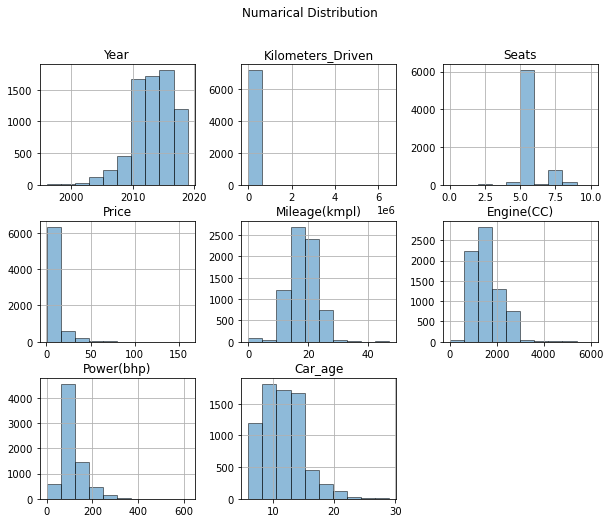

In [34]:
plt.figure(figsize=(10,8))
df1.hist(figsize=(10,8), bins=10, edgecolor='k', alpha=0.5)
plt.ticklabel_format(style='plain', axis='x')
plt.suptitle("Numarical Distribution")
plt.show()

Name


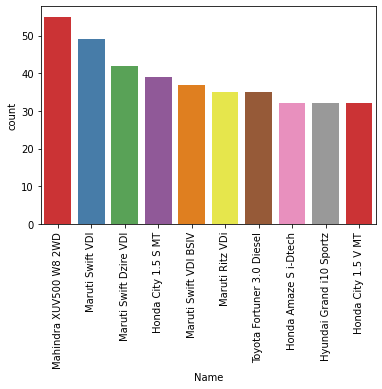

Location


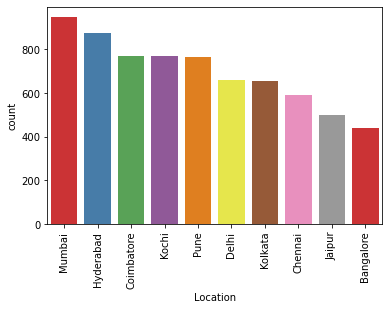

Fuel_Type


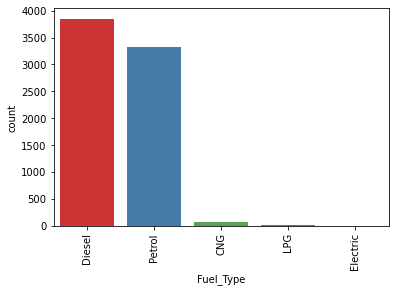

Transmission


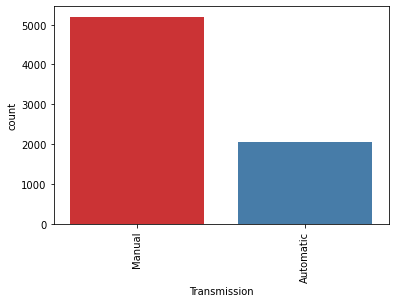

Owner_Type


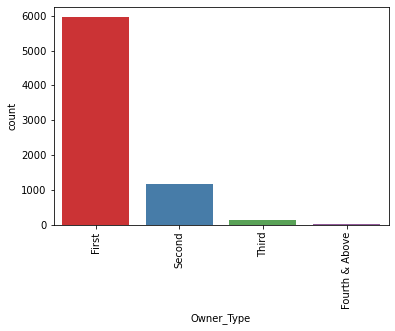

Brand


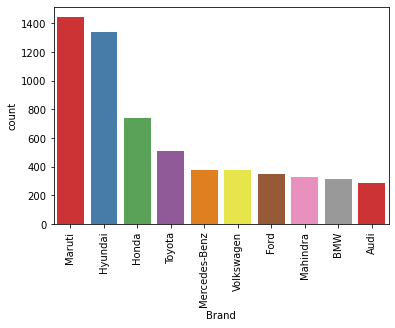

Model


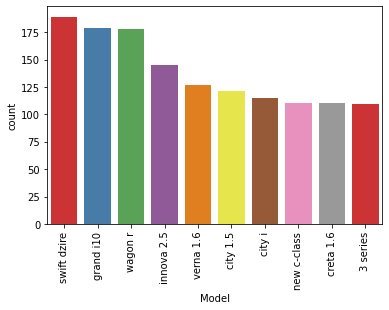

In [35]:
for col in categorical:
    print(col)
    sns.countplot(x=col, data=df1, order=df1[col].value_counts().head(10).index, palette='Set1')
    plt.xticks(rotation=90)
    plt.show()

From the count plot, we can have below observations

- Mumbai has the highest number of cars available for purchase, followed by Hyderabad and Coimbatore
- ~53% of cars have fuel type as Diesel this shows diesel cars provide higher performance
- ~72% of cars have manual transmission
- ~82 % of cars are First owned cars. This shows most of the buyers prefer to purchase first-owner cars
- ~20% of cars belong to the brand Maruti followed by 19% of cars belonging to Hyundai


### **EDA Multiveriate Analysis**

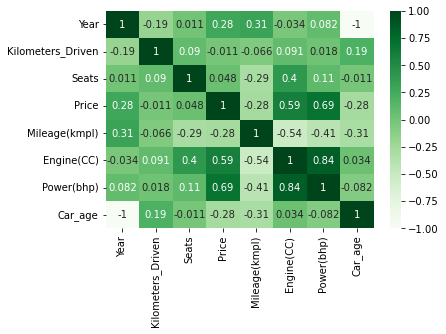

In [36]:
corr = df1[numarical].corr()
sns.heatmap(corr, annot=True, cmap='Greens')
plt.show()

Pair Plot provides below insights:

- The variable Year has a positive correlation with price and mileage
- A year has a Negative correlation with kilometers-Driven
- Mileage is negatively correlated with Power
- As power increases, mileage decreases
- Car with recent make is higher at prices. As the age of the car increases price decreases
- Engine and Power increase, and the price of the car increases

A bar plot can be used to show the relationship between Categorical variables and continuous variables

In [37]:
df1.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Seats', 'Price', 'Mileage(kmpl)',
       'Engine(CC)', 'Power(bhp)', 'Car_age', 'Brand', 'Model'],
      dtype='object')

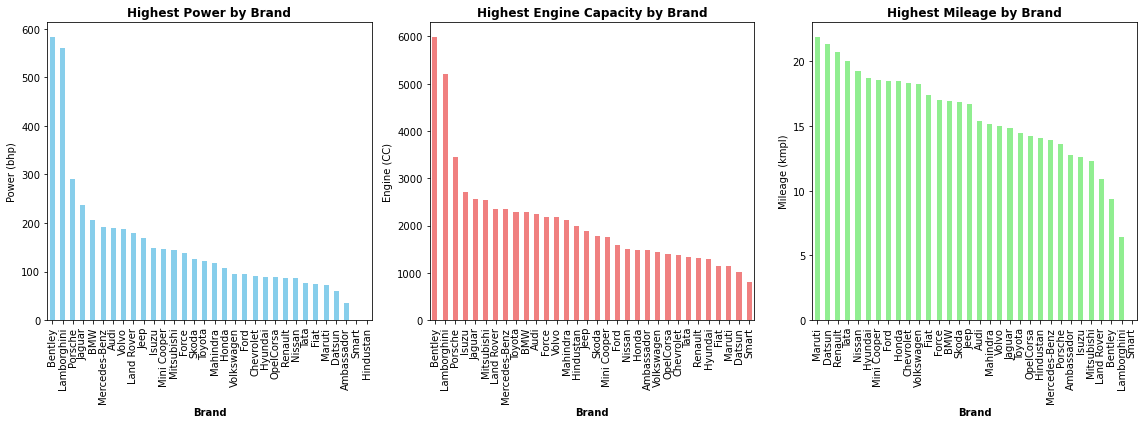

In [38]:
mileage = df1.groupby('Brand')['Mileage(kmpl)'].mean().sort_values(ascending=False)
power = df1.groupby('Brand')['Power(bhp)'].mean().sort_values(ascending=False)
Engine = df1.groupby('Brand')['Engine(CC)'].mean().sort_values(ascending=False)

fig, ax = plt.subplots(1,3, figsize=(16,6))

# Plot Power
power.plot(kind='bar', ax=ax[0], color='skyblue')
ax[0].set_title('Highest Power by Brand', fontweight='bold')
ax[0].set_ylabel('Power (bhp)')
ax[0].set_xlabel('Brand', fontweight='bold')

# Plot Engine
Engine.plot(kind='bar', ax=ax[1], color='lightcoral')
ax[1].set_title('Highest Engine Capacity by Brand', fontweight='bold')
ax[1].set_ylabel('Engine (CC)')
ax[1].set_xlabel('Brand', fontweight='bold')

# Plot Mileage
mileage.plot(kind='bar', ax=ax[2], color='lightgreen')
ax[2].set_title('Highest Mileage by Brand', fontweight='bold')
ax[2].set_ylabel('Mileage (kmpl)')
ax[2].set_xlabel('Brand', fontweight='bold')

plt.tight_layout()
plt.show()

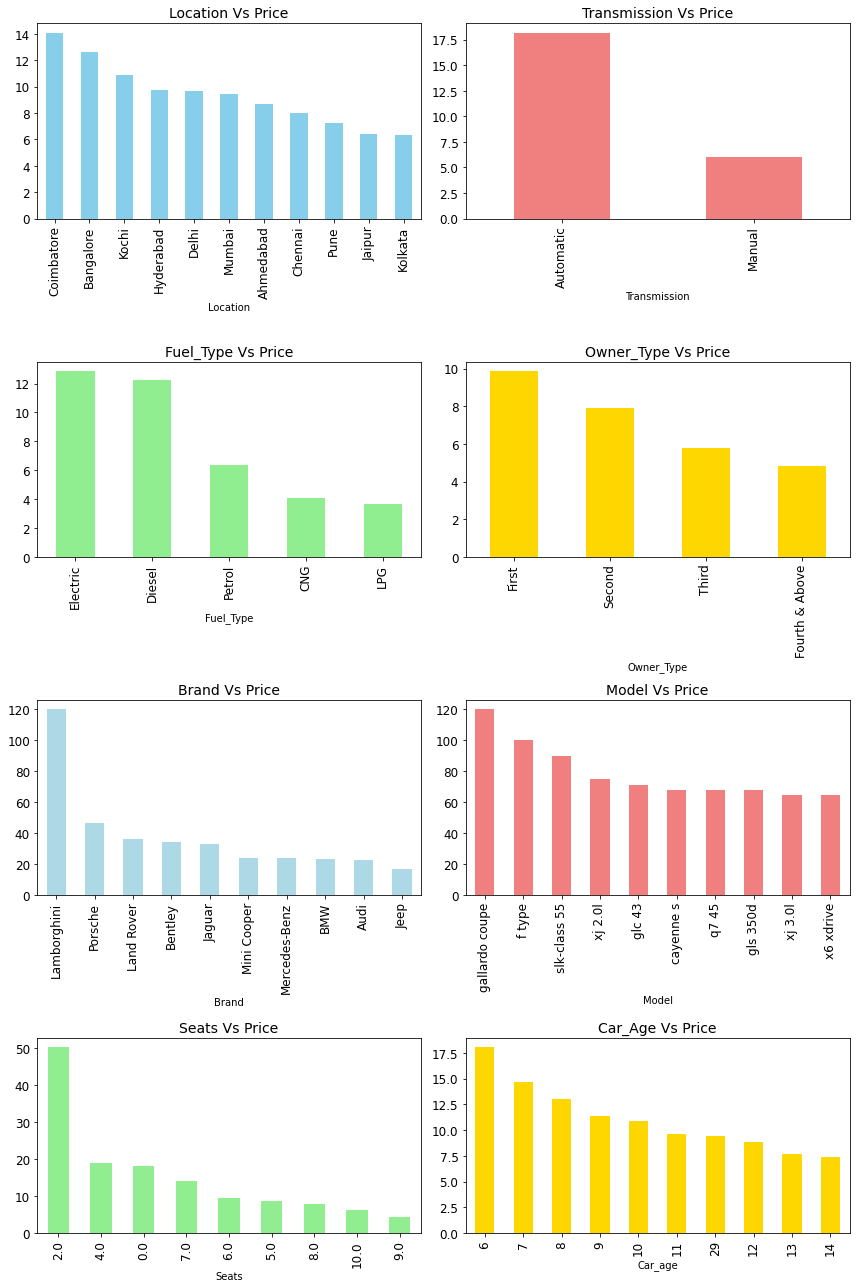

In [39]:
# Define features and titles for plotting
features = [
    ('Location', 'Location Vs Price', 'skyblue'),
    ('Transmission', 'Transmission Vs Price', 'lightcoral'),
    ('Fuel_Type', 'Fuel_Type Vs Price', 'lightgreen'),
    ('Owner_Type', 'Owner_Type Vs Price', 'gold'),
    ('Brand', 'Brand Vs Price', 'lightblue'),
    ('Model', 'Model Vs Price', 'lightcoral'),
    ('Seats', 'Seats Vs Price', 'lightgreen'),
    ('Car_age', 'Car_Age Vs Price', 'gold')
]

fig, axarr = plt.subplots(4, 2, figsize=(12, 18))

for i, (feature, title, color) in enumerate(features):
    row, col = divmod(i, 2)  # Calculate subplot indices
    if feature in ['Brand', 'Model', 'Car_age']:  # Handle cases where we limit the number of bars
        df1.groupby(feature)['Price'].mean().sort_values(ascending=False).head(10).plot.bar(
            ax=axarr[row][col], fontsize=12, color=color
        )
    else:
        df1.groupby(feature)['Price'].mean().sort_values(ascending=False).plot.bar(
            ax=axarr[row][col], fontsize=12, color=color
        )
    axarr[row][col].set_title(title, fontsize=14)

plt.tight_layout()
plt.show()

Observations

- The price of cars is high in Coimbatore and less price in Kolkata and Jaipur
- Automatic cars have more price than manual cars.
- Diesel and Electric cars have almost the same price, which is maximum, and LPG cars have the lowest price
- First-owner cars are higher in price, followed by a second
- The third owner’s price is lesser than the Fourth and above
- Lamborghini brand is the highest in price
- Gallardocoupe Model is the highest in price
- 2 Seater has the highest price followed by 4 Seater
- The latest model cars are high in price

### **Conclusion**
Car prices are influenced by where you buy them, whether they're automatic or manual, the type of fuel they use, how many owners they've had, the brand and model, the number of seats, and how new they are. Knowing these trends can guide buyers in making smart choices based on their preferences and budget.